
# Árvore binária de busca

Visualização:
- https://visualgo.net/en/bst
- https://graphviz.readthedocs.io/en/stable/api.html
- https://github.com/xflr6/graphviz/blob/master/examples/graphviz-notebook.ipynb

## **Exemplo 1**

In [15]:
class No:
  def __init__(self, valor):
    self.valor = valor
    self.esquerda = None
    self.direita = None  

In [16]:
def inserir(no, valor):
    
    # Se a árvore estiver vazia
    if no == None:
      novo = No(valor)  
      no = novo
    elif (valor < no.valor):
      no.esquerda = inserir(no.esquerda, valor)
    else:
      no.direita = inserir(no.direita, valor)
    return no
  

  # Raiz, esquerda, direita
def pre_ordem(no):
    if no != None:
      print(no.valor)
      pre_ordem(no.esquerda)
      pre_ordem(no.direita)

  # Esquerda, raiz, direita
def em_ordem(no):
    if no != None:
      em_ordem(no.esquerda)
      print(no.valor)
      em_ordem(no.direita)

  # Esquerda, direita, raiz
def pos_ordem(self, no):
    if no != None:
      pos_ordem(no.esquerda)
      pos_ordem(no.direita)
      print(no.valor)

def abb_retira(no, valor):
    
    if no == None:
      print('A árvore está vazia')
      return None
    elif no.valor > valor:
         no.esquerda = abb_retira(no.esquerda, valor);
    elif no.valor < valor:
         no.direita = abb_retira(no.direita, valor);
    else: #achou o nó a remover    
    
        # O nó a ser apagado é uma folha
        if (no.esquerda == None) and (no.direita == None):
             return None

        # O nó a ser apagado não possui filho na direita
        elif no.direita == None:      
             no = no.esquerda

        # O nó a ser apagado não possui filho na esquerda
        elif no.esquerda == None:
             no = no.direita

        # O nó possui dois filhos
        else:
          sucessor = no.esquerda
          while sucessor.direita != None:
                sucessor = sucessor.direita


          no.valor = sucessor.valor
          sucessor.valor = valor
          no.esquerda = abb_retira(no.esquerda, valor);
    
    return no 

def imprimeGraph(no, f):
    if no != None:
        if(no.esquerda != None):
            f.edge(str(no.valor),str(no.esquerda.valor))
            imprimeGraph(no.esquerda,f)
        if(no.direita != None):
            f.edge(str(no.valor),str(no.direita.valor))  
            imprimeGraph(no.direita,f)
    return f

### Inserção

In [17]:
#Gera um no vazio (None)
arvore = None

#Cria uma ABB
arvore = inserir(arvore, 53)
arvore = inserir(arvore, 30)
arvore = inserir(arvore, 14)
arvore = inserir(arvore, 39)
arvore = inserir(arvore, 9)
arvore = inserir(arvore, 23)
arvore = inserir(arvore, 34)
arvore = inserir(arvore, 49)
arvore = inserir(arvore, 72)
arvore = inserir(arvore, 61)
arvore = inserir(arvore, 84)
arvore = inserir(arvore, 79)      


### Visualização

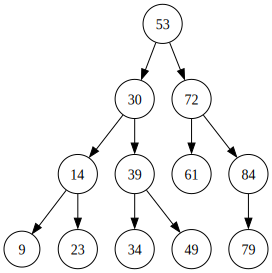

In [18]:
import graphviz
f = graphviz.Digraph('Binary Search Tree')
f.attr(rankdir='TD', size='4')
f.attr('node', shape='circle')

### Chama a função de impressão
imprimeGraph(arvore, f)

### Remoção

In [19]:
arvore = abb_retira(arvore, 30)

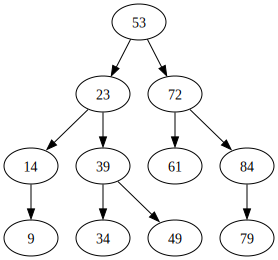

In [20]:
### Chama a função de impressão
f.clear(True)
imprimeGraph(arvore,f)

## Desenvolver as seguintes funções em pyhton:
* altura da árvore
* profundidade de um determinado nó

In [21]:
def altura(no):
    if no == None:
        return -1
    dir = altura(no.direita)
    esq= altura(no.esquerda)

    if esq>dir:
        return esq+1
    else:
        return dir+1
    
def nivelNo(no, valor):
    count = 0
    if(no.valor!=valor):
        if(no.valor>valor):
            count +=nivelNo(no.esquerda,valor)
            return 1+count
        else:
            count+=nivelNo(no.direita,valor)
            return 1+count
    return count

In [22]:
print(altura(arvore))

print(nivelNo(arvore,53))

3
0


## **Exemplo 2**

In [23]:
!pip install drawtree

In [24]:
%%file ABB.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct arv {
  int valor;
  struct arv *esq;
  struct arv *dir;
} Arv;

void pre_ordem(Arv *raiz, FILE* f) {
  if (raiz != NULL) {    
    printf("%d\n", raiz->valor);
    fprintf(f, "%d\n",raiz->valor); 
    pre_ordem(raiz->esq,f);
    pre_ordem(raiz->dir,f);
  }
}

Arv *insereArv(Arv *raiz, int info) {
  // Caso base
  if (raiz == NULL) {
    Arv *novo = (Arv *)malloc(sizeof(Arv));
    novo->valor = info;
    novo->esq = NULL;
    novo->dir = NULL;
    return novo;
  } else {
    if (raiz->valor > info) {
      raiz->esq = insereArv(raiz->esq, info);
    } else {
      raiz->dir = insereArv(raiz->dir, info);
    }
    return raiz;
  }
}

int main() {
  FILE *fptr;
  fptr = fopen("bTree.txt", "w");
  
  if (fptr != NULL) {
    printf("Arquivo criado com sucesso!\n");
  }
  else {
    printf("Failed to create the file.\n");
    // exit status for OS that an error occurred
    return -1;
  }  
    
  Arv *raiz = NULL;
  raiz = insereArv(raiz, 10);
  raiz = insereArv(raiz, 8);
  raiz = insereArv(raiz, 30);
  raiz = insereArv(raiz, 35);
  raiz = insereArv(raiz, 2);
  raiz = insereArv(raiz, 9);
  raiz = insereArv(raiz, 15);
  raiz = insereArv(raiz, 33);
  raiz = insereArv(raiz, 22);
  pre_ordem(raiz,fptr);
  fclose(fptr);
  return 0;
}


Overwriting ABB.c


In [25]:
!gcc ABB.c -o abb
!abb

Arquivo criado com sucesso!
10
8
2
9
30
15
22
35
33


In [26]:
!dir

 O volume na unidade C n�o tem nome.
 O N�mero de S�rie do Volume � D2AD-BBB0

 Pasta de c:\Users\damac\Desktop\codigos\EST.DAD\python\Docs

30/05/2023  19:33    <DIR>          .
30/05/2023  19:33    <DIR>          ..
20/03/2023  15:09             3.615 1.Variaveis e Objetos.ipynb
30/05/2023  19:33            38.168 10_Aula_Python_Arvore_Binaria_Busca.ipynb
20/03/2023  14:45             1.921 2.Estruturas de Decisao.ipynb
22/03/2023  14:43             2.188 3.EstruturasRepeticao.ipynb
22/03/2023  14:58             4.431 4.Listas.ipynb
27/03/2023  14:07            11.057 5. Dicionario-Conjunto-Tuplas.ipynb
27/03/2023  14:51            11.317 6.numpy.ipynb
27/03/2023  14:07             4.157 7.Funcoes.ipynb
19/04/2023  15:34            13.143 8.Lista_encadeada_simples.ipynb
26/04/2023  15:02             1.568 9_colectionsDequeFIlaPilha.ipynb
30/05/2023  19:33             1.386 ABB.c
30/05/2023  19:33            47.041 abb.exe
29/05/2023  15:17             1.481 ABB2.c
30/05/2023  19:33  

In [27]:
## Faz a leitura da arvore gerada em C
# opening the file in read mode

# reading the file
bTree = []
with open("bTree.txt", 'r') as f:
     while True:
        line = f.readline()
         
        if not line:
            break
        
        bTree.append(int(line))

# printing the data
print(bTree)
f.close()

[10, 8, 2, 9, 30, 15, 22, 35, 33]


In [28]:
from drawtree import draw_bst
draw_bst(bTree)

     10
     / \
    /   \
   /     \
  8      30
 / \     / \
2   9   /   \
       /     \
      15     35
       \     /
       22   33


## Construir a ABB gerada utilizando o **Exemplo 1**.
* Fazer uma função que retorna a quantidade de nós da árvore 

In [29]:
%%file ABB2.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct arv {
  int valor;
  struct arv *esq;
  struct arv *dir;
} Arv;

void pre_ordem(Arv *raiz, FILE* f) {
  if (raiz != NULL) {    
    printf("%d\n", raiz->valor);
    fprintf(f, "%d\n",raiz->valor); 
    pre_ordem(raiz->esq,f);
    pre_ordem(raiz->dir,f);
  }
}

Arv *insereArv(Arv *raiz, int info) {
  // Caso base
  if (raiz == NULL) {
    Arv *novo = (Arv *)malloc(sizeof(Arv));
    novo->valor = info;
    novo->esq = NULL;
    novo->dir = NULL;
    return novo;
  } else {
    if (raiz->valor > info) {
      raiz->esq = insereArv(raiz->esq, info);
    } else {
      raiz->dir = insereArv(raiz->dir, info);
    }
    return raiz;
  }
}

int main() {
  FILE *fptr;
  fptr = fopen("cTree.txt", "w");
  
  if (fptr != NULL) {
    printf("Arquivo criado com sucesso!\n");
  }
  else {
    printf("Failed to create the file.\n");
    // exit status for OS that an error occurred
    return -1;
  }  
    
  Arv *raiz = NULL;
  raiz = insereArv(raiz, 53);
  raiz = insereArv(raiz, 30);
  raiz = insereArv(raiz, 14);
  raiz = insereArv(raiz, 39);
  raiz = insereArv(raiz, 9);
  raiz = insereArv(raiz, 23);
  raiz = insereArv(raiz, 34);
  raiz = insereArv(raiz, 49);
  raiz = insereArv(raiz, 72);
  raiz = insereArv(raiz, 61);
  raiz = insereArv(raiz, 84);
  raiz = insereArv(raiz, 79);
  pre_ordem(raiz,fptr);
  fclose(fptr);
  return 0;
}


Overwriting ABB2.c


In [30]:
!gcc ABB2.c -o abb
!abb

Arquivo criado com sucesso!
53
30
14
9
23
39
34
49
72
61
84
79


In [31]:
cTree = []
with open("cTree.txt", 'r') as k:
     while True:
        line = k.readline()
         
        if not line:
            break
        
        cTree.append(int(line))

# printing the data
print(cTree)
k.close()

[53, 30, 14, 9, 23, 39, 34, 49, 72, 61, 84, 79]


In [32]:
from drawtree import draw_bst
draw_bst(cTree)

          53
          / \
         /   \
        /     \
       /       \
      30       72
     / \       / \
    /   \     /   \
   /     \   61   84
  14     39       /
 / \     / \     79
9  23   /   \
       34   49
